## Set Up

Be sure to run this notebook in the zoe enviroment

In [ ]:
import sys

# Get the environment name
env_name = sys.executable

# Print the environment name
print("Notebook is running in environment:", env_name)

It is recommended to fetch the latest MiDaS repo via torch hub before proceeding:

In [ ]:
import torch
torch.hub.help("intel-isl/MiDaS", "DPT_BEiT_L_384", force_reload=True)  # Triggers fresh download of MiDaS repo

Clone git repo for Zoe depth estimation

In [3]:
!git clone https://github.com/isl-org/ZoeDepth.git

fatal: destination path 'ZoeDepth' already exists and is not an empty directory.


In [ ]:
!conda env update -f ZoeDepth/environment.yml

Sanity checks, to make sure everything is working

In [ ]:
!python ZoeDepth/sanity.py

## Load Model

In [6]:
# Imports
import os
from ZoeDepth.zoedepth.utils.misc import colorize
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Choose witch model to use
repo = "isl-org/ZoeDepth"

# Zoe_N
model = torch.hub.load(repo, "ZoeD_N", pretrained=True)

In [8]:
# Send model to available device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(DEVICE)

# Create a depth estimation for each image in a dataset

In [4]:
# Imports
import torch
import os
from ZoeDepth.zoedepth.utils.misc import colorize
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Choose witch model to use
repo = "isl-org/ZoeDepth"

# Zoe_N
model = torch.hub.load(repo, "ZoeD_N", pretrained=True)

In [7]:
# Send model to available device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(DEVICE)

In [ ]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

# Define the directory path
directory = "/Path/To/Simulation/Samples/Train/or/Test/"

# Iterate through all folders in the directory
for foldername in tqdm(os.listdir(directory), total=len(os.listdir(directory))):
    folder_path = os.path.join(directory, foldername)
    
    # Check if the item is a folder
    if os.path.isdir(folder_path):
        # Iterate through all files in the folder
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Check if the file is an image
            if filename.lower().endswith((".png", ".jpg")) \
               and "depth" not in filename.lower():
                # Load the image
                image = Image.open(file_path).convert('RGB')
                
                # Perform depth estimation on the image (replace with your own depth estimation code)
                depth_estimation = model.infer_pil(image)
                
                # Create a new filename for the depth estimation result
                depth_filename = filename[:-4] + "_depth_array.npy"
                depth_filepath = os.path.join(folder_path, depth_filename)
                
                # Save the depth estimation array
                np.save(depth_filepath, depth_estimation)

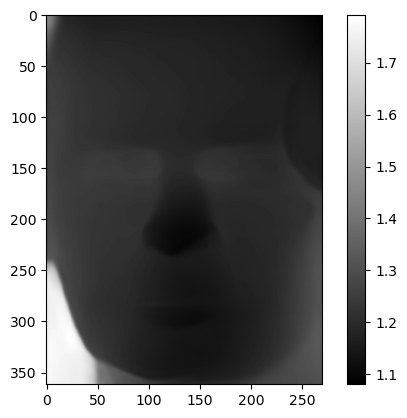

In [65]:
base_dir = "/Path/To/A/Single/Sample/Image/"

# Load the NumPy array
my_array = np.load(os.path.join(base_dir, "1684279235.5701942/1684279235.5701942_up_8_depth_array.npy"))

# Plot the array
plt.imshow(my_array, cmap='gray')  # cmap='gray' for grayscale, remove for color images
plt.colorbar()  # Add a colorbar if desired
plt.show()